# Introduction

In this Loan data I'll use supervised learning - classification 

We will see how the classification model can be used to find a credit risk prediction model. 
So that it can target prospective borrowers who meet the criteria and are profitable for the borrower.

* Objective

- menganalisis karakteristik loan customer
- membuat model credit risk prediction model
- mencoba merumuskan strategi pemasaran yang sesuai.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = 'D:/INTERNSHIP/week 4/loan_data_2007_2014.csv'

## load data set

In [3]:
na_simbol = ['*','-','--','.','---',' ','n/a','Nan','nan', 0.0, 0]
dataset = pd.read_csv(filename,na_values=na_simbol)


C:\Users\HP\AppData\Local\Temp\ipykernel_6980\406514733.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(filename,na_values=na_simbol)


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466284 non-null  float64
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466052 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [41]:
dataset.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verificatio

In [5]:
dataset.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dataset.shape

(466285, 75)

## Data Understanding

In [7]:
dataset.head(2)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dataset.isnull().sum()

Unnamed: 0               1
id                       0
member_id                0
loan_amnt                0
funded_amnt              0
                     ...  
all_util            466285
total_rev_hi_lim     70431
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 75, dtype: int64

In [9]:
object_column = [x for x in dataset.select_dtypes('object').columns]

In [10]:
for kolom in object_column:
    print ('ini adalah unik value dari kolom : {}'.format(kolom))
    print (dataset[kolom].unique())
    print ('\n ====================================== ') 

ini adalah unik value dari kolom : term
[' 36 months' ' 60 months']

ini adalah unik value dari kolom : grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

ini adalah unik value dari kolom : sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

ini adalah unik value dari kolom : emp_title
[nan 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

ini adalah unik value dari kolom : emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

ini adalah unik value dari kolom : home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

ini adalah unik value dari kolom : verification_status
['Verified' 'Source Verified' 'Not Verified']

ini adalah unik value dari kolom : issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11'

In [11]:
dataset.info

<bound method DataFrame.info of         Unnamed: 0       id  member_id  loan_amnt  funded_amnt  \
0              NaN  1077501    1296599       5000         5000   
1              1.0  1077430    1314167       2500         2500   
2              2.0  1077175    1313524       2400         2400   
3              3.0  1076863    1277178      10000        10000   
4              4.0  1075358    1311748       3000         3000   
...            ...      ...        ...        ...          ...   
466280    466280.0  8598660    1440975      18400        18400   
466281    466281.0  9684700   11536848      22000        22000   
466282    466282.0  9584776   11436914      20700        20700   
466283    466283.0  9604874   11457002       2000         2000   
466284    466284.0  9199665   11061576      10000        10000   

        funded_amnt_inv        term  int_rate  installment grade  ...  \
0                4975.0   36 months     10.65       162.87     B  ...   
1                2500.0   60 

In [43]:
dataset.dtypes

Unnamed: 0          float64
id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 75, dtype: object

In [12]:
dataset['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

<AxesSubplot:>

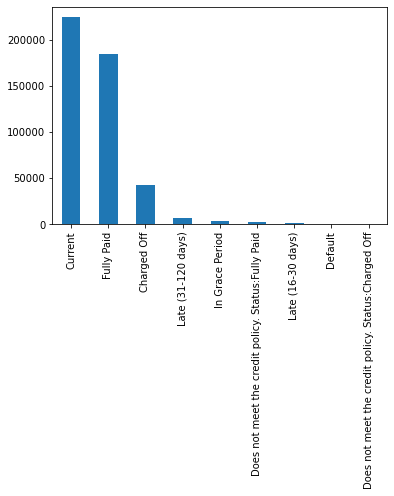

In [13]:
dataset['loan_status'].value_counts().plot(kind='bar')

In [24]:
dataset['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

<AxesSubplot:>

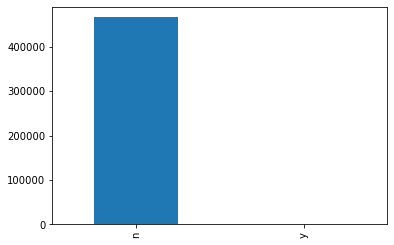

In [14]:
dataset['pymnt_plan'].value_counts().plot(kind='bar')

In [25]:
dataset['pymnt_plan'].value_counts()

n    466276
y         9
Name: pymnt_plan, dtype: int64

<AxesSubplot:>

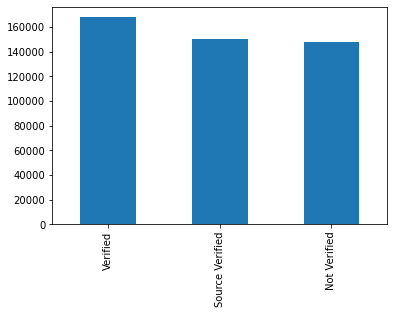

In [16]:
dataset['verification_status'].value_counts().plot(kind='bar')

In [26]:
dataset['verification_status'].value_counts()

Verified           168055
Source Verified    149993
Not Verified       148237
Name: verification_status, dtype: int64

<AxesSubplot:>

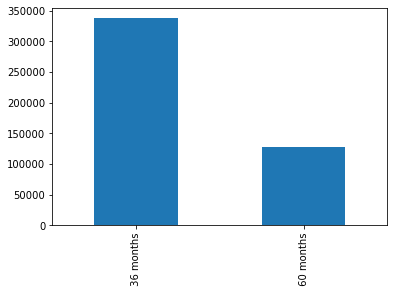

In [17]:
dataset['term'].value_counts().plot(kind='bar')

In [27]:
dataset['term'].value_counts()

 36 months    337953
 60 months    128332
Name: term, dtype: int64

In [28]:
dataset['grade'].value_counts()

B    136929
C    125293
D     76888
A     74867
E     35757
F     13229
G      3322
Name: grade, dtype: int64

<AxesSubplot:>

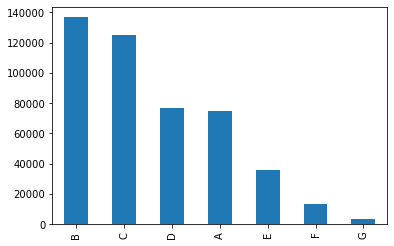

In [19]:
dataset['grade'].value_counts().plot(kind='bar')

In [23]:
dataset['funded_amnt'].value_counts()

10000    32930
12000    25426
15000    23370
20000    22571
35000    16458
         ...  
34075        1
31475        1
33400        1
34825        1
34775        1
Name: funded_amnt, Length: 1354, dtype: int64

<AxesSubplot:ylabel='Frequency'>

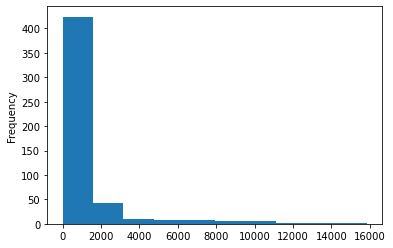

In [33]:
pd.value_counts(dataset['int_rate']).plot.hist()

In [35]:
dataset['addr_state' ].value_counts()

CA    71450
NY    40242
TX    36439
FL    31637
IL    18612
NJ    18061
PA    16424
OH    15237
GA    14975
VA    14222
NC    12682
MI    11549
MA    11072
MD    10974
AZ    10712
WA    10517
CO     9739
MN     8158
MO     7508
CT     7204
IN     6525
NV     6519
TN     5984
OR     5949
WI     5911
AL     5853
SC     5583
LA     5489
KY     4438
KS     4190
OK     4117
AR     3488
UT     3428
NM     2588
HI     2487
WV     2412
NH     2232
RI     2050
DC     1426
MT     1396
DE     1272
AK     1251
MS     1226
WY     1128
SD      980
VT      905
IA       14
NE       14
ID       12
ME        4
Name: addr_state, dtype: int64

<AxesSubplot:>

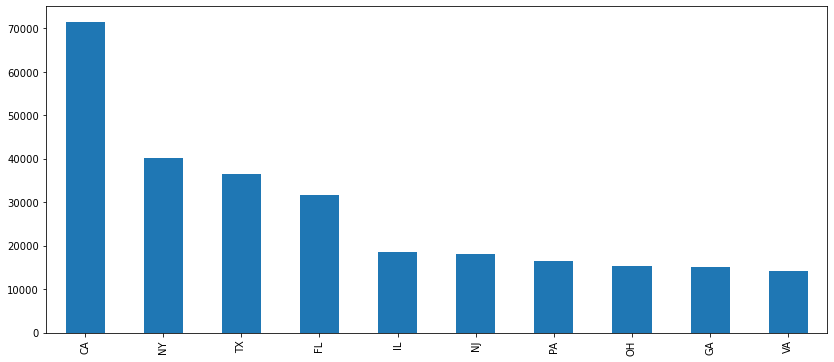

In [108]:
dataset['addr_state'].value_counts().head(10).plot(kind='bar',figsize=(14,6))

In [47]:
dataset['policy_code'].value_counts(normalize = True)*100

1    100.0
Name: policy_code, dtype: float64

peminjam 100 % memnuhi kriteria peminjaman

In [54]:
dataset['emp_title'].value_counts(normalize = True)*100

Teacher                              1.230690
Manager                              1.011632
Registered Nurse                     0.527927
RN                                   0.502397
Supervisor                           0.448373
                                       ...   
The Eastern Arizona AHEC             0.000228
Delaware Quarries.com                0.000228
McCauley trucking and warehousing    0.000228
save mart supermarkets               0.000228
Server Engineer Lead                 0.000228
Name: emp_title, Length: 205475, dtype: float64

In [48]:
dataset['purpose'].value_counts(normalize = True)*100

debt_consolidation    58.804165
credit_card           22.337626
home_improvement       5.691155
other                  5.080584
major_purchase         2.107724
small_business         1.504016
car                    1.157447
medical                0.986950
moving                 0.642097
vacation               0.533365
wedding                0.502482
house                  0.486612
educational            0.090503
renewable_energy       0.075276
Name: purpose, dtype: float64

Sekitar 58% dari pinjaman berisiko adalah untuk tujuan Konsolidasi Hutang.
Risiko untuk kartu kredit adalah 2 dalam 22% kasus. Akan menarik untuk melihat apakah pinjaman untuk konsolidasi utang sebagian besar berisiko.

In [51]:
dataset[dataset['purpose']=='debt_consolidation']["term"].value_counts(normalize = True)*100

 36 months    69.57822
 60 months    30.42178
Name: term, dtype: float64

sekitar 70% pinjaman konsolidasi hutang  jumlah pembayaran pinjamannya 36 bulan dan 60 bulan sekitar 30%

In [52]:
dataset[dataset['purpose']=='debt_consolidation']["pymnt_plan"].value_counts(normalize = True)*100

n    99.998176
y     0.001824
Name: pymnt_plan, dtype: float64

In [55]:
dataset[dataset['purpose']=='debt_consolidation']["emp_title"].value_counts(normalize = True)*100

Teacher                                  1.281558
Manager                                  1.033167
Registered Nurse                         0.549459
RN                                       0.526773
Supervisor                               0.481017
                                           ...   
Politico                                 0.000385
Centene Corp.                            0.000385
Wekiva Springs Center                    0.000385
US Reel                                  0.000385
Chief of Interpretation (Park Ranger)    0.000385
Name: emp_title, Length: 129518, dtype: float64

sekitar 1% profesi guru yang memiliki pinjaman berupa konsolidasi hutang. 

<AxesSubplot:xlabel='purpose', ylabel='count'>

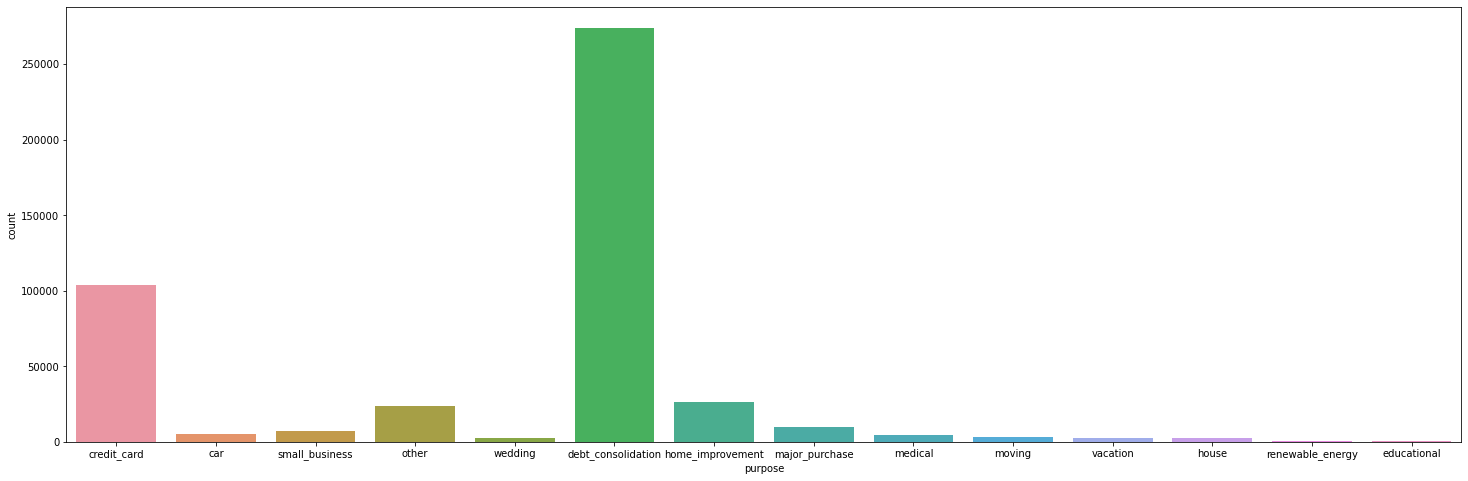

In [62]:
plt.figure(figsize=(25,8))
sns.countplot(data=dataset, x='purpose')

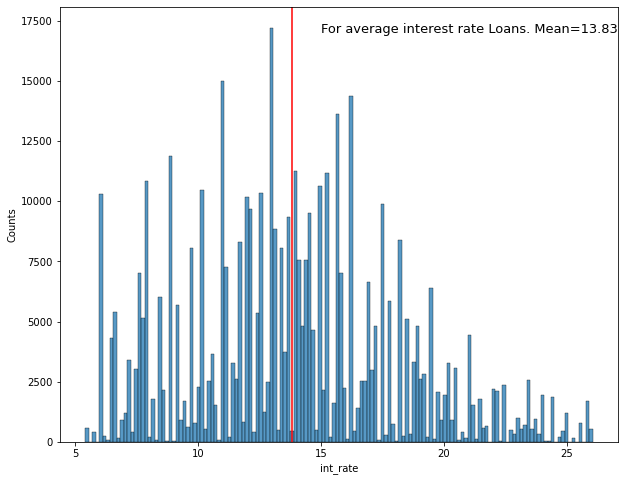

In [83]:
fig = plt.figure(figsize = (10,8))
sns.histplot(dataset[dataset["policy_code"]==1]["int_rate"], kde = False)
plt.axvline(x = dataset[dataset["policy_code"]==1]["int_rate"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(15,17000,"For average interest rate Loans. Mean={}".format(round(dataset[dataset["policy_code"]==1]["int_rate"].mean(),2)), fontsize =13)
plt.show()

rata rata bunga adalah sebanyak 13%

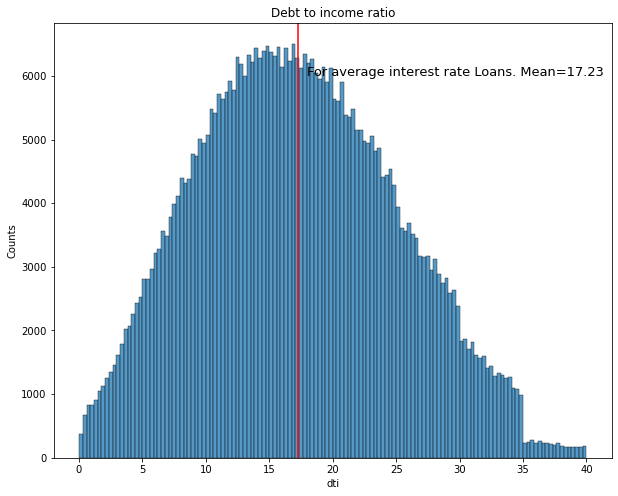

In [91]:
fig = plt.figure(figsize = (10,8))
sns.histplot(dataset[dataset["policy_code"]==1]["dti"], kde = False)
plt.axvline(x = dataset[dataset["policy_code"]==1]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.text(18,6000,"For average interest rate Loans. Mean={}".format(round(dataset[dataset["policy_code"]==1]["dti"].mean(),2)), fontsize =13)
plt.title("Debt to income ratio") 
plt.show()

Rasio Hutang terhadap Pendapatan sebesar 17%

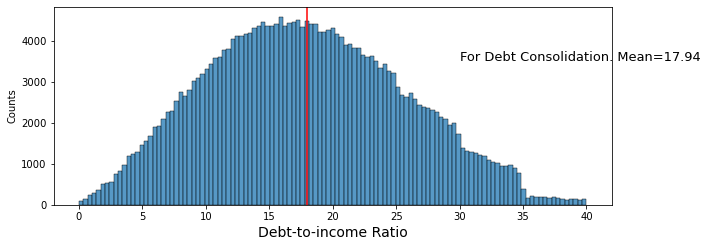

In [98]:
fig = plt.figure(figsize = (10,8))

ax1 = plt.subplot(211)

sns.histplot(dataset[(dataset["policy_code"]==1) & (dataset["purpose"]=="debt_consolidation")]["dti"], kde = False)
plt.axvline(x = dataset[(dataset["policy_code"]==1) & (dataset["purpose"]=="debt_consolidation")]["dti"].mean(), color = 'r') # Mean line
#plt.axvline(x = loan_data[loan_data["credit_policy"]==0]["int_rate"].median(), color = 'b') # median line
plt.ylabel("Counts")
plt.xlabel("Debt-to-income Ratio", fontsize = 14)
plt.text(30,3500,"For Debt Consolidation. Mean={}".format(round(dataset[(dataset["policy_code"]==1) & (dataset["purpose"]=="debt_consolidation")]["dti"].mean(),2)), fontsize =13)
plt.show()

In [100]:
mean_dti_by_policy_code= dataset.groupby(["purpose","policy_code"])["dti"].mean().reset_index()
mean_dti_by_policy_code

,purpose,policy_code,dti
0,car,1,13.381486
1,credit_card,1,17.524348
2,debt_consolidation,1,17.935279
3,educational,1,11.536204
4,home_improvement,1,14.514199
5,house,1,13.239136
6,major_purchase,1,13.686181
7,medical,1,15.936890
8,moving,1,15.145489
9,other,1,15.801812


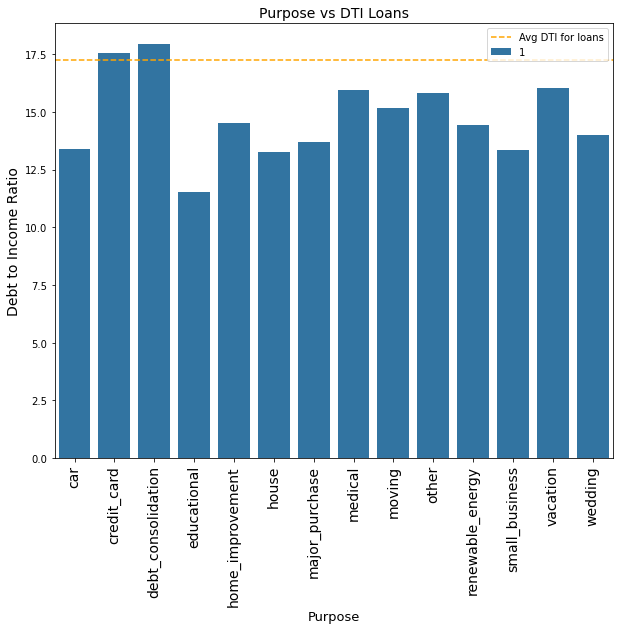

In [104]:
fig = plt.figure(figsize = (10,8))
ax1 = plt.subplot(1,1,1)

sns.barplot(data = mean_dti_by_policy_code,x ="purpose" , y="dti", hue = "policy_code")
plt.xticks(rotation = 90, fontsize = 14)
plt.ylabel("Debt to Income Ratio", fontsize = 14)
plt.xlabel("Purpose", fontsize = 13)
plt.title("Purpose vs DTI Loans", fontsize = 14)

ax2 = ax2.twinx().twiny()
#plt.axhline(y = loan_data[loan_data["policy_code"]==0]["dti"].mean(), color = 'blue', linestyle = '--', label = "Avg DTI for Risky loans")
plt.axhline(y = dataset[dataset["policy_code"]==1]["dti"].mean(), color = 'orange', linestyle = '--', label = "Avg DTI for loans")
plt.legend(loc = 1)
plt.show()

Semakin tinggi rasio DTI, semakin tinggi peluang risiko. 
debt consolidation dan credit card memiliki debt income ratio di atas rata rata

Akan menarik untuk memeriksa variabel-variabel yang berkorelasi dengan DTI.

## DATA PREPARATION

## Check duplicate

In [109]:
dataset.duplicated().any()

False

## Missing Value

In [131]:
total = dataset.isnull().sum().sort_values(ascending = False)
percent = round((dataset.isnull().sum()/dataset.isnull().count()*100),2).sort_values(ascending = False)
missing_loan_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_loan_data.tail(40)

,Total,Percent
emp_title,27588,5.92
emp_length,21008,4.51
revol_util,2624,0.56
revol_bal,2269,0.49
total_rec_prncp,399,0.09
last_pymnt_amnt,390,0.08
total_rec_int,379,0.08
last_pymnt_d,376,0.08
total_pymnt_inv,365,0.08
dti,363,0.08


karena data masih kotor dan belum bersih, maka kita bersihkan dulu yang berkorelasi. 


### Handling Missing Value 

In [126]:
dataset[dataset['emp_title'].isnull()]

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,NaN,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,30.0,1032111,1261745,4375,4375,4375.0,36 months,7.51,136.11,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,42.0,1069314,1304202,3000,3000,3000.0,36 months,18.25,108.84,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466256,466256.0,9835883,9309502,15000,15000,15000.0,36 months,16.99,534.72,D,...,NaN,NaN,NaN,NaN,NaN,NaN,29300.0,NaN,NaN,NaN
466262,466262.0,9825193,11677266,14000,14000,14000.0,36 months,16.24,493.86,C,...,NaN,NaN,NaN,NaN,NaN,NaN,24400.0,NaN,NaN,NaN
466265,466265.0,9774870,11626983,32000,32000,31975.0,36 months,7.90,1001.29,A,...,NaN,NaN,NaN,NaN,NaN,NaN,30800.0,NaN,NaN,NaN
466273,466273.0,9199716,11061625,6000,6000,6000.0,36 months,10.99,196.41,B,...,NaN,NaN,NaN,NaN,NaN,NaN,25400.0,NaN,NaN,NaN


In [132]:
dataset['emp_title'] = dataset['emp_title'].fillna('other')

In [134]:
dataset['emp_title'].isnull().sum()

0

In [135]:
dataset['dti'].fillna(dataset['dti'].mode()[0], inplace=True)

In [136]:
dataset['dti'].isnull().sum()

0

In [137]:
dataset['funded_amnt'].fillna(dataset['funded_amnt'].mode()[0], inplace=True)

In [138]:
dataset['funded_amnt'].isnull().sum()

0

In [139]:
dataset['out_prncp'].fillna(dataset['out_prncp'].mode()[0], inplace=True)

In [140]:
dataset['out_prncp'].isnull().sum()

0

In [149]:
Feature = dataset[['out_prncp','funded_amnt','term','int_rate','emp_title','dti','installment']]
#Feature = pd.concat([Feature,pd.get_dummies(dataset['emp_title'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,out_prncp,funded_amnt,term,int_rate,emp_title,dti,installment
0,5684.61,5000,36 months,10.65,other,27.65,162.87
1,5684.61,2500,60 months,15.27,Ryder,1.00,59.83
2,5684.61,2400,36 months,15.96,other,8.72,84.33
3,5684.61,10000,36 months,13.49,AIR RESOURCES BOARD,20.00,339.31
4,766.90,3000,60 months,12.69,University Medical Group,17.94,67.79


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [153]:
le = LabelEncoder()
Feature['term'] = le.fit_transform(Feature['term'])

C:\Users\HP\AppData\Local\Temp\ipykernel_6980\182818666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feature['term'] = le.fit_transform(Feature['term'])


In [154]:
Feature.head(2)

,out_prncp,funded_amnt,term,int_rate,emp_title,dti,installment
0,5684.61,5000,0,10.65,other,27.65,162.87
1,5684.61,2500,1,15.27,Ryder,1.00,59.83


In [156]:
Feature['emp_title']=le.fit_transform(Feature['emp_title'])

C:\Users\HP\AppData\Local\Temp\ipykernel_6980\2239768996.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feature['emp_title']=le.fit_transform(Feature['emp_title'])


In [157]:
Feature.head(2)

,out_prncp,funded_amnt,term,int_rate,emp_title,dti,installment
0,5684.61,5000,0,10.65,194465,27.65,162.87
1,5684.61,2500,1,15.27,131796,1.00,59.83


In [183]:
dataset['loan_status']=le.fit_transform(dataset['loan_status'])

In [185]:
dataset['loan_status'].head(2)

0    5
1    0
Name: loan_status, dtype: int32

## Scaling

In [186]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

In [187]:
scale = MinMaxScaler()
Feature['funded_amnt'] = scale.fit_transform(np.array(Feature['funded_amnt']).reshape(-1,1))

C:\Users\HP\AppData\Local\Temp\ipykernel_6980\3038286092.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Feature['funded_amnt'] = scale.fit_transform(np.array(Feature['funded_amnt']).reshape(-1,1))


In [188]:
Feature.head(2)

,out_prncp,funded_amnt,term,int_rate,emp_title,dti,installment
0,5684.61,0.130435,0,10.65,194465,27.65,162.87
1,5684.61,0.057971,1,15.27,131796,1.00,59.83


In [189]:
X = Feature

In [190]:
X

,out_prncp,funded_amnt,term,int_rate,emp_title,dti,installment
0,5684.61,0.130435,0,10.65,194465,27.65,162.87
1,5684.61,0.057971,1,15.27,131796,1.00,59.83
2,5684.61,0.055072,0,15.96,194465,8.72,84.33
3,5684.61,0.275362,0,13.49,2257,20.00,339.31
4,766.90,0.072464,1,12.69,165724,17.94,67.79
...,...,...,...,...,...,...,...
466280,12574.00,0.518841,1,14.47,59755,19.85,432.64
466281,5684.61,0.623188,1,19.97,30516,18.45,582.50
466282,14428.31,0.585507,1,16.99,195139,25.65,514.34
466283,5684.61,0.043478,0,7.90,141073,5.39,62.59


In [191]:
y = dataset['loan_status'].values

In [192]:
y

array([5, 0, 5, ..., 1, 5, 1])

In [193]:
#normalize data 

In [194]:
X= preprocessing.StandardScaler().fit(X).transform(X)

In [195]:
X

array([[-0.31394761, -1.12296278, -0.61622502, ...,  1.38536357,
         1.32963071, -1.10557481],
       [-0.31394761, -1.42510086,  1.62278383, ...,  0.35730221,
        -2.07099793, -1.52876259],
       [-0.31394761, -1.43718639, -0.61622502, ...,  1.38536357,
        -1.08590025, -1.42814049],
       ...,
       [ 1.48087558,  0.77446438,  1.62278383, ...,  1.39642028,
         1.07442406,  0.33792103],
       [-0.31394761, -1.48552848, -0.61622502, ...,  0.5094879 ,
        -1.51081933, -1.5174272 ],
       [-0.66295458, -0.51868662, -0.61622502, ...,  1.38536357,
         0.70820251, -0.26482586]])

## Modeling 

In [196]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### KNN

In [208]:
#Training
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
mean_acc

array([0.75591108, 0.72841717, 0.78952786, 0.78662192, 0.80264216,
       0.80086213, 0.80723163, 0.80615932, 0.80974082, 0.80845406,
       0.81012685])

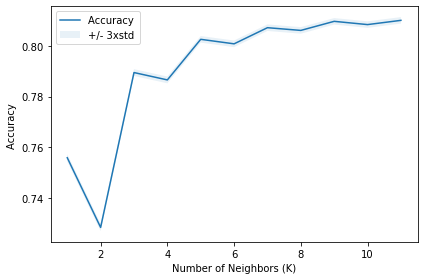

The best accuracy was with 0.8101268537482441 with k= 11


In [209]:
plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)

In [210]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.8101268537482441 with k= 11


In [211]:
k = 7
# Train Model and Predict  
loanknn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
loanknn

KNeighborsClassifier(n_neighbors=7)

In [213]:
yhat = loanknn.predict(X_test)
yhat

array([5, 5, 1, ..., 5, 5, 1])

In [214]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loanknn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.8394034764146391
Test set Accuracy:  0.8072316287249215


In [215]:
from sklearn.metrics import classification_report

print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.29      0.13      0.18      8537
           1       0.94      0.89      0.91     45029
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00       154
           4       0.25      0.00      0.01       367
           5       0.73      0.93      0.82     36765
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       248
           8       0.00      0.00      0.00      1373

    accuracy                           0.81     93257
   macro avg       0.25      0.22      0.21     93257
weighted avg       0.77      0.81      0.78     93257



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [216]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted')

0.7795187477329514

In [217]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat,average='weighted')

0.6871848331642375

#### Decision tree

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfustionMx = [];
for n in range(1,md):
    
    #Train Model and Predict  
    loant = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    yhat=loant.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.674759  , 0.87680281, 0.87680281, 0.87683498, 0.87684571,
       0.87686715, 0.87717812, 0.87704944, 0.87695294])

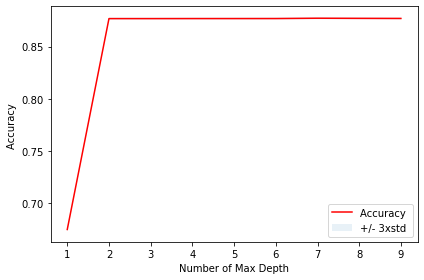

In [221]:
plt.plot(range(1,md),mean_acc,'r')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show()

In [222]:
#Building the decision tree with max depth of 6
loandt = DecisionTreeClassifier(criterion="entropy", max_depth = 6)

# Check the default parameters
loandt 

# Train the Decision tree model
loandt.fit(X_train,y_train)

# Predict using the model
yhat= loandt.predict(X_test)

In [223]:
#Calculating the train and test accuracy
print("Train set Accuracy: ", metrics.accuracy_score(y_train, loandt.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
#Building the confusion matrix
print (classification_report(y_test, yhat))

Train set Accuracy:  0.8770360401900126
Test set Accuracy:  0.876877875119294
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      8537
           1       0.95      1.00      0.97     45029
           2       0.00      0.00      0.00       151
           3       0.00      0.00      0.00       154
           4       0.00      0.00      0.00       367
           5       0.80      1.00      0.89     36765
           6       0.00      0.00      0.00       633
           7       0.00      0.00      0.00       248
           8       0.56      0.01      0.02      1373

    accuracy                           0.88     93257
   macro avg       0.26      0.22      0.21     93257
weighted avg       0.78      0.88      0.82     93257



C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
# Calculate the F1 score
f1_score(y_test, yhat, average='weighted')

0.8213892768631871

In [225]:
# Calculate the jaccard index
jaccard_score(y_test, yhat,average='weighted')

0.7744906610013577